In [1]:
# This line allows you to display matplotlib plots within the Jupyter Notebook
%matplotlib inline

# Import External packages 

import os
import numpy as np
import matplotlib.pyplot as plt

# Configure the working directory (Important: This should be set to home directory of 'dynworm' folder)

default_dir = os.path.dirname(os.getcwd())
os.chdir(default_dir)

# Import Main module

import dynworm as dw

In [2]:
# Setting AVL to True enable its voltage gated channels to support action potential as described by Qiang et al 2019
# https://www.cell.com/cell/fulltext/S0092-8674(18)31034-1?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867418310341%3Fshowall%3Dtrue

additional_params = {"AWA": True,
                     "AVL": False}

In [3]:
# Provide additional_params to initialize_params_neural() to enable spiking AVL neuron

dw.network_sim.initialize_params_neural(additional_params = additional_params)
dw.network_sim.initialize_connectivity()

Using the default neural parameters
Nonlinear neural parameters enabled
Using the default connectivity


In [4]:
print(dw.utils.neuron_names_2_inds(['AWAL']))

[73]


In [5]:
input_vec = np.zeros(dw.network_sim.params_obj_neural['N'])
ablation_mask = np.ones(dw.network_sim.params_obj_neural['N'], dtype = 'bool')

In [6]:
# Ablating AWAL disconnets it from the rest of the network so there is no synaptic or gap currents from other neurons
# This emulates the experimental setting Qiang used to measure the spikes of AWA with real C. elegans
# If including spiking AWA neuron as part of the network dynamics skip this step

ablation_mask[73] = False

In [7]:
# Seaborn plot setting

import seaborn as sns

sns.set(style = 'ticks', font_scale = 2.1)

-3
Network integration prep completed...
Computing network dynamics with Julia engine...


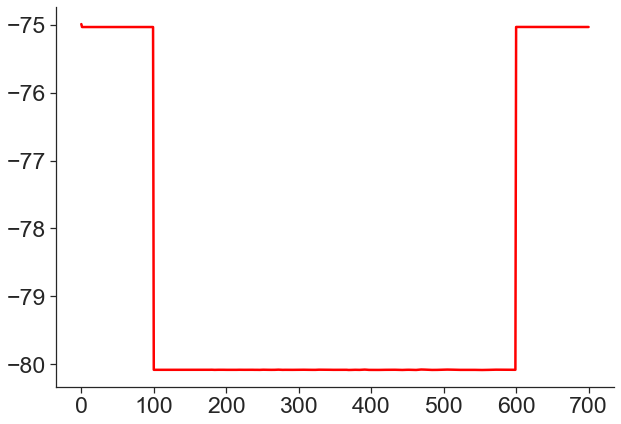

30.824723720550537
0
Network integration prep completed...
Computing network dynamics with Julia engine...


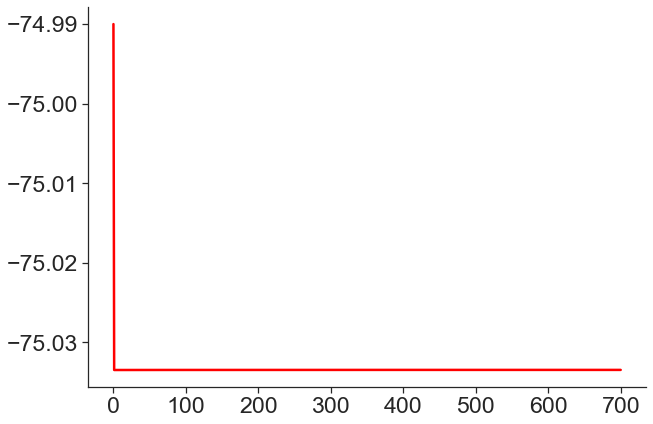

11.508041143417358
3
Network integration prep completed...
Computing network dynamics with Julia engine...


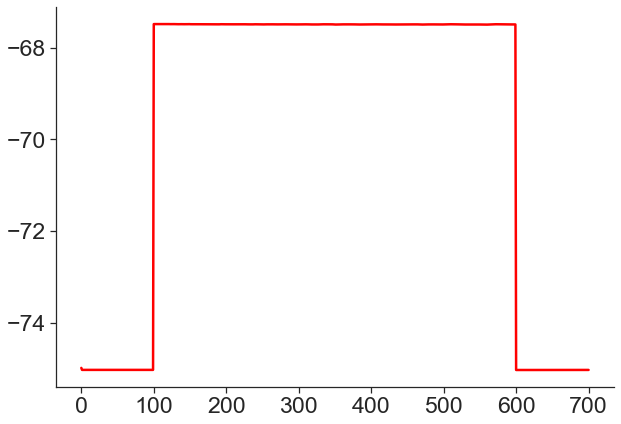

23.041404724121094
6
Network integration prep completed...
Computing network dynamics with Julia engine...


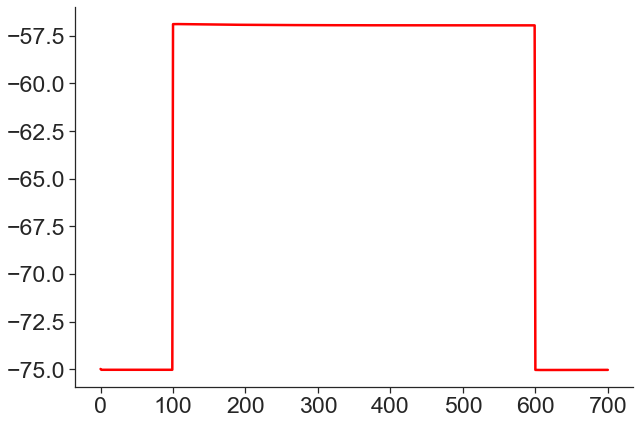

26.522923469543457
9
Network integration prep completed...
Computing network dynamics with Julia engine...


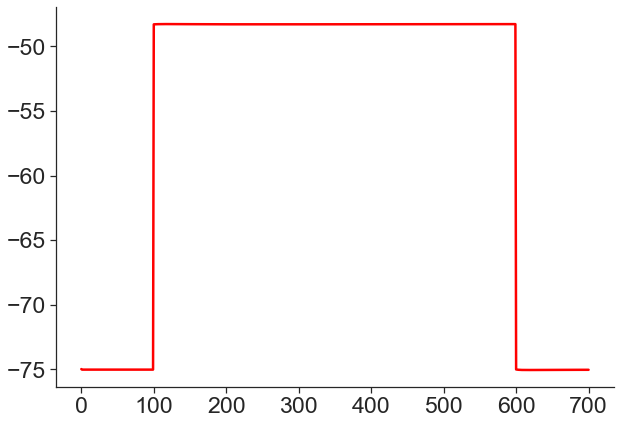

28.17990779876709
12
Network integration prep completed...
Computing network dynamics with Julia engine...


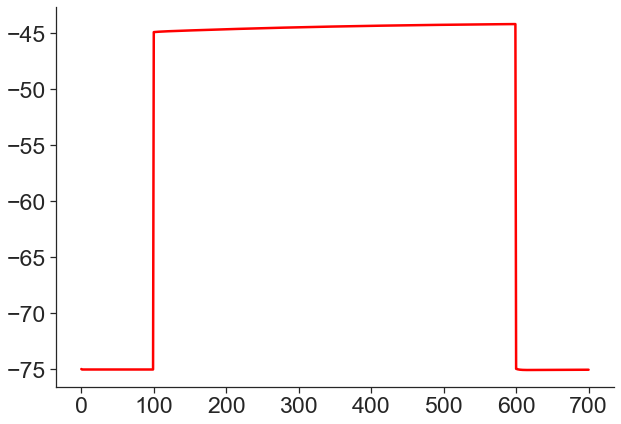

46.00055265426636
15
Network integration prep completed...
Computing network dynamics with Julia engine...


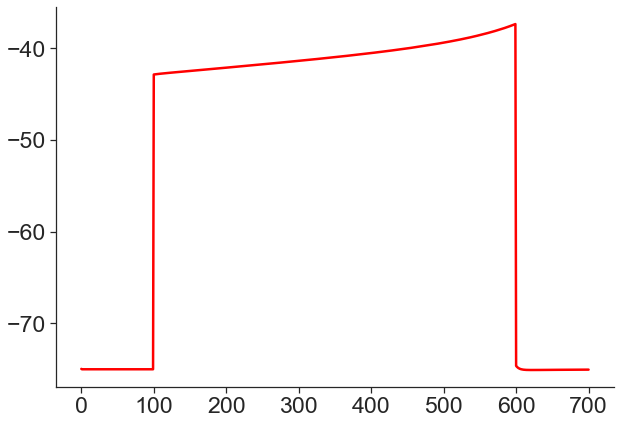

42.91987180709839
18
Network integration prep completed...
Computing network dynamics with Julia engine...


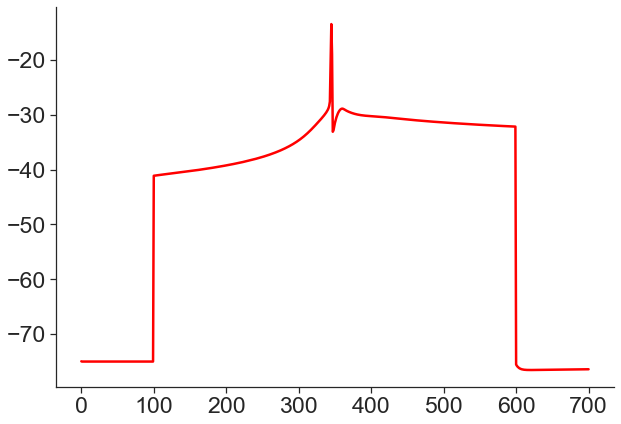

56.76736259460449
21
Network integration prep completed...
Computing network dynamics with Julia engine...


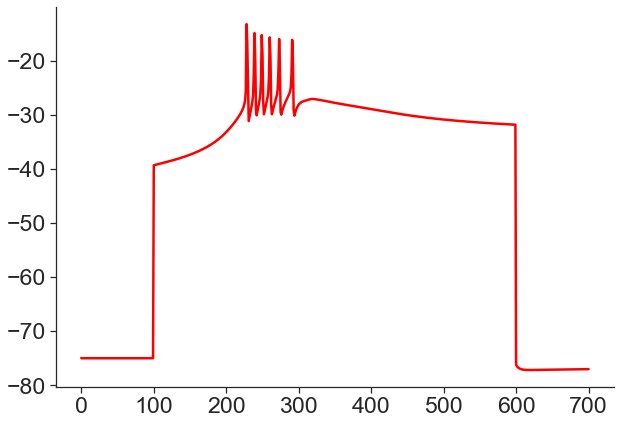

86.01523876190186
24
Network integration prep completed...
Computing network dynamics with Julia engine...


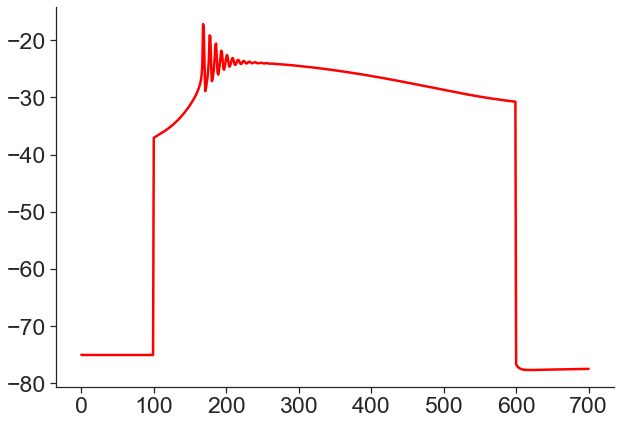

65.86761736869812
27
Network integration prep completed...
Computing network dynamics with Julia engine...


C:\Users\Jimin\Dropbox\academic\Research\research_code\celegans_sim_api_v1_open\dynworm\network_sim.py:1121: RuntimeWarning: overflow encountered in exp
  np.reciprocal(1.0 + np.exp(-params_obj_neural['B']*(np.subtract(Vvec, vth)))))
C:\Users\Jimin\Dropbox\academic\Research\research_code\celegans_sim_api_v1_open\dynworm\network_sim.py:1901: RuntimeWarning: overflow encountered in exp
  kir = -np.log(1+np.exp(-0.2*(v-AWA_dict['vK']-AWA_dict['gKI'])))/0.2+AWA_dict['gKI']
C:\Users\Jimin\Dropbox\academic\Research\research_code\celegans_sim_api_v1_open\dynworm\network_sim.py:1900: RuntimeWarning: overflow encountered in cosh
  tau = 1.0/np.cosh((v-AWA_dict['vt1'])/(2*AWA_dict['vt2']))
C:\Users\Jimin\Dropbox\academic\Research\research_code\celegans_sim_api_v1_open\dynworm\network_sim.py:1920: RuntimeWarning: divide by zero encountered in true_divide
  np.put(dc1_AWA_vec, AWA_dict['AWA_inds'], (minf*winf/AWA_dict['mx']-c1)/AWA_dict['TC1']-minf*winf*c2/(AWA_dict['mx']*AWA_dict['TC1'])-c1/(2*AW

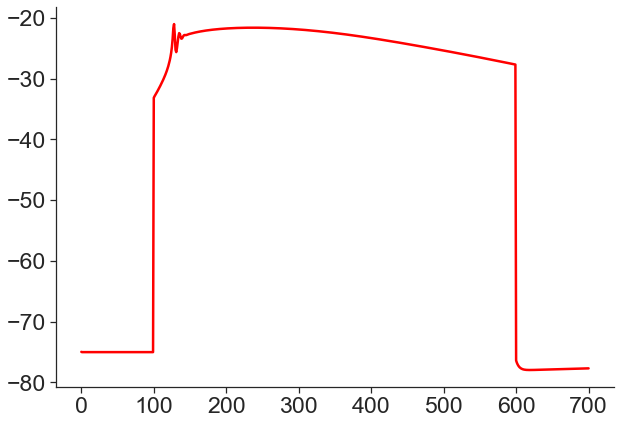

45.41733646392822


In [11]:
# A for loop where each loop simulates the voltage activity of AVL when given input current ranging from -2pA to 12pA
# Reproduces Figure 5B from Qiang's Cell paper above

import time

#AWA_external_input_current_list = np.arange(-1, 13) * 2
AWA_external_input_current_list = np.arange(-1, 10) * 3
awa_voltage_sols = []

for stim in AWA_external_input_current_list:
    
    print(stim)
    
    start = time.time()

    input_mat = np.zeros((701, 279))
    input_mat[100:600, 73] = stim
    
    result_dict_network = dw.network_sim.run_network_dyninput(input_mat = input_mat, ablation_mask = ablation_mask)
    v_sol = result_dict_network['raw_v_solution']
    
    awa_voltage_sols.append(v_sol[:, 73])
    
    plt.figure(figsize = (10, 7))

    plt.plot(v_sol[:, 73], linewidth = 2.5, color = 'red')
    sns.despine()
    plt.show()
    
    end = time.time()
    print(end - start)

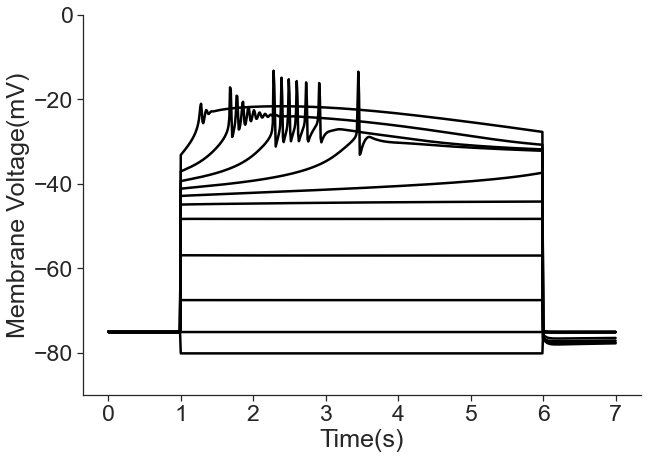

In [12]:
plt.figure(figsize = (10, 7))

for k in range(len(awa_voltage_sols)):

    plt.plot(np.linspace(0, 7, 701), awa_voltage_sols[k], linewidth = 2.5, color = 'black')
    plt.xlabel('Time(s)')
    plt.ylabel('Membrane Voltage(mV)')
    plt.ylim(-90, 0)
    sns.despine()